<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Simulation_of_Business_Process_Using_SimPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and Import Required Packages

In [44]:
pip install simpy

In [0]:
from simpy import events
import random
import simpy
import math as math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
plt.style.use('fivethirtyeight')

## Create Simulation as Function

This function uses the simulation package SimPy to simulate a shaved-ice stand (like you would find in a shopping mall).  The goal is to see how many customer would be missed during peak times given the number of employees and the assumption that customers will leave when the line is longer than 5 people.

These results are run on a time-table that would represent a day, and then simulated many times with random variation to better approximate the realities.  After, the results are plotted, included the actual vs potential customers through time, and line length through time.  It is easy to visualize how one affects the other, and the parameters of the simulation can be iteratively modified to find an acceptable trade-off between employees, line-length, and sales.

More than anything else, this notebook was put together to show how SimPy works, and what simulations of business processes look like.

In [0]:
def run():
    new_customer = 100
    interval = 10
    line_depth = [0]
    customers_served = [0]
    potential_customers = [0]
    customer_rate = [0]
    time = [0]
    served = []
    unserved = []
    ts = []
    tus = []

    # Options for Customer Generation (chose to do these instead of sampling a 
    #distribution because it achieves one simple peak-time)
    def parabolaFunc(i):
        return ((i - new_customer/2)**2)/new_customer

    def sinFunc(i):
        return abs(math.log(math.sin(i/20)))

    def logFunc(i):
        return math.log(i**3)



    def new_buyer(env,buyer,stand,new):
        for i in range(new):

            #Buyer Process
            b = buyer(env,stand, i+1, trans_time=50)
            env.process(b)

            #Distribution for Customer Frequency
            upper_bound = parabolaFunc(i) + 5
            lower_bound = upper_bound - 5
            t = random.uniform(lower_bound,upper_bound)

            #Time between Customers/Time Passage
            time.append(env.now)

            yield env.timeout(t)


    def buyer(env,stand, name, trans_time):

        #Tracking Customer Arrival and Line Length
        arrive = round(env.now,2)
        in_line = stand.count
        line_depth.append(in_line)

        #Request place in line, Acceptable length == Capacity of Resource
        with stand.request() as req:
            results = yield req | env.timeout(0)

            if req in results:

                #Monitoring Potential and Served Customers who Stayed
                potential_customers.append((potential_customers[-1])+1)
                customers_served.append((customers_served[-1])+1)

                #Time to Service a Customer
                yield env.timeout(trans_time)

                #Tracking Finished Service
                served.append(1)



            else:

                #Tracking Potential and Served for those that left
                potential_customers.append((potential_customers[-1])+1)
                customers_served.append((customers_served[-1]))

                #Counting Unserved Customers
                unserved.append(1)

            total_served = sum(served)
            total_unserved = sum(unserved)
            ts.append(total_served)
            tus.append(total_unserved)

    #Envornment at t=1, resource at capacity=5, and process of Customers passing and staying
    env = simpy.Environment(initial_time=1)
    stand = simpy.Resource(env, capacity=5)
    env.process(new_buyer(env, buyer,stand,new_customer))
    env.run(until=15000)

    return plot_sim(time, potential_customers, customers_served, line_depth, ts, tus)

In [0]:
def plot_sim(time, potential_customers, customers_served, line_depth, tu, tus):

  #Plot Potential Customers vs Customers Served against Time
  plt.plot(time, potential_customers, label='Potential')
  plt.plot(time, customers_served, label='Served')
  plt.ylabel('Customers')
  plt.xlabel('Time')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

  #Plotting Potential Customers and Customers Served against eachother
  plt.plot(potential_customers, customers_served)
  plt.ylabel('Customers Served')
  plt.xlabel('Potential Customers')
  plt.show()

  #Plotting Line Length vs Potential Customers
  plt.plot(potential_customers, line_depth)
  plt.ylabel('Line_Length')
  plt.xlabel('Potential Customers')
  plt.show()

  #Plotting Line Length vs Time
  plt.plot(time, line_depth)
  plt.ylabel('Line_Length')
  plt.xlabel('Time')
  plt.show()


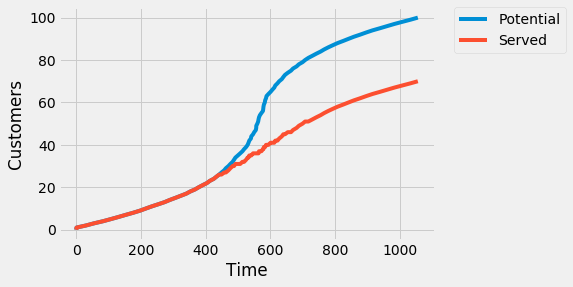

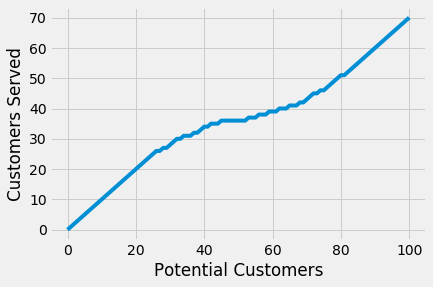

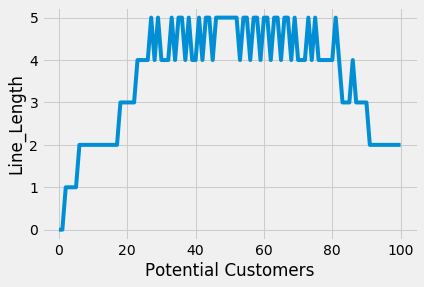

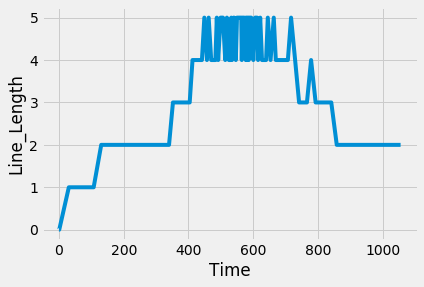

In [48]:
# Run the Simulation
run()